<a href="https://colab.research.google.com/github/MirandaCarou/Research-Intership-Memory/blob/main/Qutrits_neutrinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pennylane --upgrade
!pip install qiskit --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 10.5 MB/s eta 0:00:00


### Sección sobre Qutrits en el Paper y Cálculo de Entropía

Los **qutrits** son sistemas cuánticos en un espacio de Hilbert tridimensional $H_3$. Los qutrits están representados por una superposición de tres estados ortonormales $|1\rangle$, $|2\rangle$ y $|3\rangle$, y la densidad del estado cuántico se puede expresar mediante las matrices de Gell-Mann (generadores de $SU(3)$ ). Esto permite mapear el sistema de tres sabores de neutrinos a un modelo de qutrit y analizar su comportamiento mediante una representación geométrica en una esfera de Poincaré generalizada para $SU(3)$.

La densidad de un qutrit se define como:

$$\rho_{3 \times 3} = \frac{1}{3} \left(I + \sqrt{3} \, \vec{n} \cdot \vec{\lambda}\right)$$,

donde $\vec{n}$ es un vector unitario en un espacio real de ocho dimensiones asociado a los parámetros de los estados de neutrinos, y $\vec{\lambda}$ son las matrices de Gell-Mann.

El cálculo de la **entropía de mezcla** de un estado mixto reducido esimportante para caracterizar el entrelazamiento y las propiedades cuánticas del sistema. La entropía se obtiene como:

$$E(\rho) = -\sum_{i} x_i \log_3(x_i)$$

donde $x_i$ son los autovalores de $\rho$.

In [ ]:
import pennylane as qml
import matplotlib.pyplot as plt
from qiskit.quantum_info import DensityMatrix, entropy, Statevector
from IPython.display import display, Math, Latex
import numpy as np


Here’s the list of operators and observables supported with default.qutrit:

    Operators: qml.TRX, qml.TRY, qml.TRZ, qml.THadamard, qml.TShift, qml.TClock, qml.TAdd, qml.TSWAP, qml.QutritBasisState, qml.QutritUnitary, qml.ControlledQutritUnitary
    Observables: qml.THermitian, qml.GellMann


In [ ]:
def print_matrix(matrix):
    """Prints a matrix using LaTeX formatting."""

    latex_code = "\\begin{bmatrix}\n"
    for row in matrix:
        latex_code += " & ".join(map(str, row)) + " \\\\\n"  # Format each row
    latex_code += "\\end{bmatrix}"

    display(Math(latex_code))  # Display using IPython's Math function

def pmns_matrix(theta12, theta23, theta13, delta):
    """Genera la matriz PMNS con los parámetros dados."""
    c12, s12 = np.cos(theta12), np.sin(theta12)
    c23, s23 = np.cos(theta23), np.sin(theta23)
    c13, s13 = np.cos(theta13), np.sin(theta13)

    e_minus_idelta = np.exp(-1j * delta)
    e_plus_idelta = np.exp(1j * delta)

    return np.array([
        [c12 * c13, s12 * c13, s13 * e_minus_idelta],
        [-s12 * c23 - c12 * s23 * s13 * e_plus_idelta,
         c12 * c23 - s12 * s23 * s13 * e_plus_idelta,
         s23 * c13],
        [s12 * s23 - c12 * c23 * s13 * e_plus_idelta,
         -c12 * s23 - s12 * c23 * s13 * e_plus_idelta,
         c23 * c13]
    ])

# Parámetros de ejemplo
theta12 = np.pi / 4
theta23 = np.pi / 6
theta13 = np.pi / 8
delta = np.pi / 2

# Crear matriz PMNS
U_pmns = pmns_matrix(theta12, theta23, theta13, delta)

print("Matriz PMNS:")
print_matrix(U_pmns)

U_pmns[0, 0]


Matriz PMNS:


<IPython.core.display.Math object>

(0.6532814824381883+0j)

In [ ]:
# Definir dispositivo con 2 wires para dos qutrits
dev = qml.device("default.qutrit", wires=2, shots=None)


"The density matrix ρ3×3 = |ψ⟩⟨ψ| is a 3 × 3 unitary matrix... The qutrit representation of the density matrix uses the eight (Hermitian, traceless) generators of SU(3) as an operator basis called the Gell-Mann matrices."

**Fórmula matriz densidd**


$$\rho_{3 \times 3} = \frac{1}{3}\left(I + \sqrt{3} \, \vec{n} \cdot \vec{\lambda} \right)$$

**Coeficientes expansion**


$$n_j = \frac{\sqrt{3}}{2} \operatorname{Tr}(\rho \lambda_j)$$


In [ ]:
def gell_mann_matrices():
    gm1 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 0]], dtype=complex)
    gm2 = np.array([[0, -1j, 0], [1j, 0, 0], [0, 0, 0]], dtype=complex)
    gm3 = np.array([[1, 0, 0], [0, -1, 0], [0, 0, 0]], dtype=complex)
    gm4 = np.array([[0, 0, 1], [0, 0, 0], [1, 0, 0]], dtype=complex)
    gm5 = np.array([[0, 0, -1j], [0, 0, 0], [1j, 0, 0]], dtype=complex)
    gm6 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0]], dtype=complex)
    gm7 = np.array([[0, 0, 0], [0, 0, -1j], [0, 1j, 0]], dtype=complex)
    gm8 = np.array([[1 / np.sqrt(3), 0, 0], [0, 1 / np.sqrt(3), 0], [0, 0, -2 / np.sqrt(3)]], dtype=complex)

    return [gm1, gm2, gm3, gm4, gm5, gm6, gm7, gm8]

"A quantum state in the Hilbert space H3 spanned by the three orthogonal qutrit states is $|ψ⟩ = α|1⟩ + β|2⟩ + γ|3⟩$... where $|α|² + |β|² + |γ|² = 1.$"

-

$$|\nu_e\rangle = e^{i\xi_1}\sin(\theta)\cos(\phi)|\nu_1\rangle + e^{i\xi_2}\sin(\theta)\sin(\phi)|\nu_2\rangle + \cos(\theta)|\nu_3\rangle$$

In [ ]:
def neutrino_state(theta, phi, eta, xi1, xi2):
    alpha = np.sin(theta) * np.cos(phi) * np.exp(1j * xi1)
    beta = np.sin(theta)* np.sin(phi) * np.exp(1j * xi2)
    gamma = np.cos(theta)
    return np.array([alpha, beta, gamma])

"Taking the ultra-relativistic limit $L ≈ t (c = 1, ℏ = 1)$ and defining $ξ1 = (E3 − E1)t/ℏ ≈ ∆m²31L/2E$, the normalized time evolved electron neutrino flavour state $|νe(t)⟩$ in qutrit basis can be written as..."

**Fórmula**

$$|\nu_e(t)\rangle = e^{-i \phi_{ij}} |\nu_e(0)\rangle$$

-

$$\phi_{ij} = \frac{\Delta m^2_{ij} L}{2E}, \quad \Delta m^2_{ij} = m_i^2 - m_j^2$$




In [ ]:
def evolve_state(state, delta_m2_ij, L, E):
    if len(delta_m2_ij) != len(state) - 1:
        raise ValueError("El tamaño de delta_m2_ij debe ser igual al número de diferencias de masas del estado (3 componentes => 2 diferencias de masa).")

    # Crear un array de fases con longitud igual al estado
    phases = np.ones(len(state), dtype=complex)
    for i in range(len(delta_m2_ij)):
        phases[i] = np.exp(-1j * delta_m2_ij[i] * L / (2 * E))

    # Aplicar las fases al estado
    evolved_state = state * phases
    # Normalizar el estado
    norm = np.linalg.norm(evolved_state)
    if not np.isclose(norm, 1):
        evolved_state /= norm

    return evolved_state


"The density matrix for the state |νe⟩ can now be cast into the form ρ3×3 = |νe⟩⟨νe| = (1/3)(I + √3 n̂·λ⃗)."

**Fórmula**

$$U = \text{QR}(\text{basis})$$

In [ ]:

#Esto es para poder usar un estado como operador unitario y inicializar el circuito a un estado (temas de pennylane)
def create_unitary_for_state(state):
    # Asegurarse de que el estado esté normalizado
    if not np.isclose(np.linalg.norm(state), 1):
        raise ValueError("El estado no está normalizado.")

    # Completar con dos vectores ortogonales para formar una base ortonormal
    basis = np.eye(3, dtype=complex)
    basis[:, 0] = state
    q, _ = np.linalg.qr(basis)  # QR decomposition para garantizar ortonormalidad
    return q


"The three-flavour states of a neutrino system can be written in the qutrit basis by identifying the mass eigenstates with the qutrit basis states of the three-dimensional Hilbert space H3."

In [ ]:
@qml.qnode(dev)
def neutrinos_circuit(state1, state2):

    unitary1 = create_unitary_for_state(state1)
    unitary2 = create_unitary_for_state(state2)

    # Preparar los estados en el dispositivo
    qml.QutritUnitary(unitary1, wires=0)
    qml.QutritUnitary(unitary2, wires=1)

    # Introducir entrelazamiento
    qml.THadamard(wires=0)
    qml.THadamard(wires=1)
    qml.TAdd(wires=[0, 1])  # Entrelazamiento

    # Retornar matriz de densidad total
    return qml.state()


The study of the Bloch matrix using the density matrix ρ gives useful symmetries in the Bloch-vector space."

**Fórmula matriz densidad**

$$\rho = |\Psi\rangle\langle\Psi|$$


**Fórmula matriz densidad  reducida**

$$\rho_A = \operatorname{Tr}_B(\rho)$$

In [ ]:
def reduced_density_matrix(rho, qutrit_index):
    dim = 3
    reduced_matrix = np.zeros((dim, dim), dtype=complex)

    if qutrit_index == 1:
        # Trace over the second qutrit
        for i in range(dim):
            for j in range(dim):
                for k in range(dim):
                    reduced_matrix[i, j] += rho[i * dim + k, j * dim + k]
    elif qutrit_index == 2:
        # Trace over the first qutrit
        for i in range(dim):
            for j in range(dim):
                for k in range(dim):
                    reduced_matrix[i, j] += rho[k * dim + i, k * dim + j]
    else:
        raise ValueError("qutrit_index must be 1 or 2. Received: {}".format(qutrit_index))

    return reduced_matrix

"The coefficients $cα = (3/2) Tr(ρ3×3λα)$ characterize the density matrix in the $SU(3)$ representation."

**Fórmula**

$$\rho = \frac{1}{3}\left(I + \sum_{i=1}^8 c_i \lambda_i \right)$$

-

$$c_i = \frac{3}{2} \operatorname{Tr}(\rho \lambda_i)$$

In [ ]:
def su3_density_matrix(state):
    lambda_matrices = gell_mann_matrices()
    c_alpha = [(3/2) * np.real(np.trace(state @ l)) for l in lambda_matrices]
    return c_alpha

"We calculate the entropy of mixing of the mixed state ρ using the formula ..."

**Fórmula**

$$E(\rho) = -\sum_{i} x_i \log_3(x_i)$$

In [ ]:
def entropy_of_mixing(rho):
    eigenvalues = np.linalg.eigvalsh(rho)
    entropy = -np.sum(eigenvalues * np.log(eigenvalues) / np.log(3))
    return entropy

 "The generalized concurrence formula as a measure of two qutrits entanglement has also been studied."

 **Fórmula**

$$C = \max\left(0, \sqrt{\lambda_1} - \sum_{i=2}^d \sqrt{\lambda_i}\right)$$

,

$$\rho_{9 \times 9} = (\mathcal{O}_3 \otimes \mathcal{O}_3) \rho_{9 \times 9}^* (\mathcal{O}_3 \otimes \mathcal{O}_3)$$

In [ ]:
def generalized_concurrence(rho):
    # Ensure rho is a valid density matrix
    assert np.allclose(rho, rho.conj().T), "Input matrix must be Hermitian."
    assert np.isclose(np.trace(rho), 1.0), "Input matrix must have trace 1."

    # 0_3 matrix
    o_3_matrix = np.array([[0, -1j, 1j], [1j, 0, -1j], [-1j, 1j, 0]], dtype=complex)

    # Compute the spin-flip operation: tilde_rho = (o_3_matrix ⊗ o_3_matrix) rho* (o_3_matrix ⊗ o_3_matrix)
    rho_conj = np.conjugate(rho)
    sigma_y_tensor = np.kron(o_3_matrix, o_3_matrix)
    tilde_rho = sigma_y_tensor @ rho_conj @ sigma_y_tensor

    # Compute the product rho * tilde_rho
    product = rho @ tilde_rho

    # Compute the eigenvalues of the product
    eigenvalues = np.linalg.eigvals(product)

    # Sort eigenvalues in descending order and clip negative values (due to numerical errors)
    eigenvalues = np.sort(eigenvalues)[::-1]
    eigenvalues = np.clip(eigenvalues, 0, None)

    # Calculate the generalized concurrence
    concurrence = max(0, np.sqrt(eigenvalues[0]) - sum(np.sqrt(eigenvalues[1:])))

    return concurrence

VECTOR ESTADO
[-0.11620267-0.39733964j  0.06955963+0.16752719j  0.30846748+0.02030863j
 -0.1783167 -0.02520992j  0.05023025+0.23588109j -0.03312571-0.10034688j
  0.25020271-0.05533796j  0.1044956 -0.42401812j -0.58137145+0.06340586j]
(<Figure size 600x300 with 1 Axes>, <Axes: >)

Estado completo del sistema de dos qutrits:
[-0.11620267-0.39733964j  0.06955963+0.16752719j  0.30846748+0.02030863j
 -0.1783167 -0.02520992j  0.05023025+0.23588109j -0.03312571-0.10034688j
  0.25020271-0.05533796j  0.1044956 -0.42401812j -0.58137145+0.06340586j]


Matriz de densidad calculada manualmente:



<IPython.core.display.Math object>



Matriz de densidad reducida del Qutrit 1:



<IPython.core.display.Math object>



Matriz de densidad reducida del Qutrit 2:



<IPython.core.display.Math object>


[0.04864653 0.14779056 0.8035629 ]

Entropía de mezcla del Qutrit 1:

0.5510365633168823

[0.04864653 0.14779056 0.8035629 ]

Entropía de mezcla del Qutrit 2:

0.5510365633168827


Concurrencia Generalizada:
0.45927929292213754



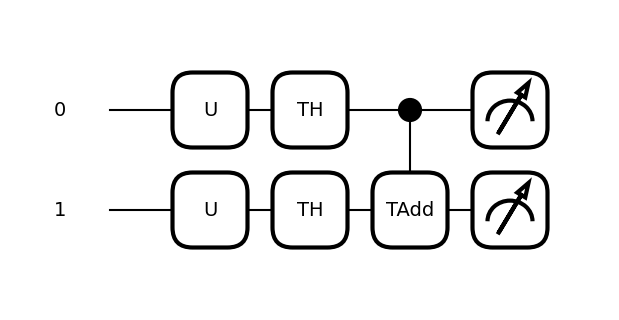

In [ ]:
# Parámetros de mezcla
params1 = [np.pi / 2, 2*np.pi / 6, 3*np.pi / 2, 0, np.pi / 2]
params2 = [np.pi / 6, np.pi / 4, np.pi / 3, np.pi / 2, 0]

# Diferencias de masas al cuadrado y parámetros de evolución
delta_m2_ij = np.array([2.4e-3, 7.5e-5])  # Diferencias de masas al cuadrado en eV^2
L = 100  # Distancia recorrida en km
E = 1  # Energía del neutrino en GeV


# Estado inicial
state1 = neutrino_state(*params1)
state2 = neutrino_state(*params2)



# Evolución temporal
state1_evo = evolve_state(state1, delta_m2_ij, L, E)
state2_evo = evolve_state(state2, delta_m2_ij, L, E)


# Obtener el estado del sistema
state = neutrinos_circuit(state1_evo, state2_evo)
print("VECTOR ESTADO")
print(state)
print(qml.draw_mpl(neutrinos_circuit, wire_order=[0,1], show_all_wires=True, decimals=1)(state1_evo, state2_evo))
print()
print("Estado completo del sistema de dos qutrits:")
print(state)
print()
# Calcular la matriz de densidad
rho = np.outer(state, np.conj(state))  # Matriz de densidad total
print("\nMatriz de densidad calculada manualmente:")
print()
print_matrix(rho.real)
print()

# Matrices de densidad reducida
# Qutrit 1 ----------------------
reduced_rho_matrix_qutrit1 = reduced_density_matrix(rho, 1)
print("\nMatriz de densidad reducida del Qutrit 1:")
print()
print_matrix(reduced_rho_matrix_qutrit1.real)
print()
# Qutrit 2 ----------------------
reduced_rho_matrix_qutrit2 = reduced_density_matrix(rho, 2)
print("\nMatriz de densidad reducida del Qutrit 2:")
print()
print_matrix(reduced_rho_matrix_qutrit2.real)
print()


# Coeficientes SU(3)
su3_reduced_rho = su3_density_matrix(reduced_rho_matrix_qutrit1)


# Qutrit 1 -------------------------------------------------
# Entropía de mezcla
entropy_qutrit1 = entropy_of_mixing(reduced_rho_matrix_qutrit1)
print("\nEntropía de mezcla del Qutrit 1:")
print()
print(entropy_qutrit1.real)
print()
# Qutrit 2 -------------------------------------------------
entropy_qutrit2 = entropy_of_mixing(reduced_rho_matrix_qutrit2)
print("\nEntropía de mezcla del Qutrit 2:")
print()
print(entropy_qutrit2.real)
print()
# Concurrencia Generalizada
concurrence_value = generalized_concurrence(rho)
print("\nConcurrencia Generalizada:")
print(concurrence_value.real)
print()



**RESULTADOS**.


- Ambos qutrits tienen prácticamente el mismo valor de **entropía** (aprox. 0.551), lo que puede indicar en este caso que el sistema bipartito se encuentra en un estado de entrelazamiento puro y el entrelazamiento se distribuye simétricamente entre los dos qutrits. Esta simetría muestra que el entrelazamiento está equilibrado.

- En cuanto a la **concurrencia generalizada**, obtenemos un valor de 0,459 que es casi la mitad del valor máximo posible (1), lo que indicaría que los dos qutrits están máximamente entrelazados. Asimismo, este resultado indica la presencia de un entrelazamiento moderado entre los dos qutrits.







#Prueba con un circuito diferente y puertas más arbitrarías

( *Puramente experimental* )

In [ ]:
@qml.qnode(dev)
def circuit_more_entangled(state1, state2):

        state1 = state1 / np.linalg.norm(state1)
        state2 = state2 / np.linalg.norm(state2)

        # Unitaries para preparar los estados iniciales
        unitary1 = create_unitary_for_state(state1)
        unitary2 = create_unitary_for_state(state2)

        qml.QutritUnitary(unitary1, wires=0)
        qml.QutritUnitary(unitary2, wires=1)

        # Entrelazamiento adicional
        qml.THadamard(wires=0)
        qml.TAdd(wires=[0, 1])

        # Introducir rotaciones
        qml.TRY(np.pi / 3, wires=1)
        qml.TShift(wires=0)

        qml.TClock(wires=1)

        return qml.state()

(<Figure size 800x300 with 1 Axes>, <Axes: >)

Estado completo del sistema de dos qutrits:
[ 0.03547064+0.0914767j   0.70949977+0.10282481j -0.23341105-0.14254021j
  0.02266504+0.18221592j -0.08982916+0.18214547j -0.41789642-0.22416593j
 -0.18035141+0.15704893j  0.10338915-0.1454702j   0.09535829+0.06022514j]


Matriz de densidad calculada manualmente:



<IPython.core.display.Math object>



Matriz de densidad reducida del Qutrit 1:



<IPython.core.display.Math object>



Matriz de densidad reducida del Qutrit 2:



<IPython.core.display.Math object>



Entropía de mezcla del Qutrit 1:

0.6958941440837603


Entropía de mezcla del Qutrit 2:

0.6958941440837603


Concurrencia Generalizada:
(0.997333826055995+1.5255211711928736e-09j)



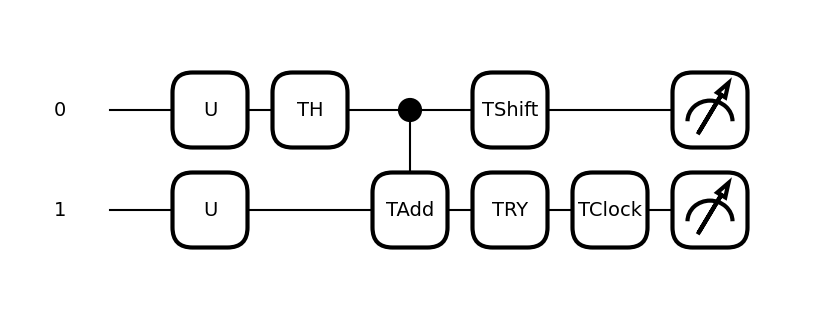

In [ ]:
# Parámetros de mezcla
params1 = [np.pi / 2, 2*np.pi / 6, 3*np.pi / 2, 0, np.pi / 2]
params2 = [np.pi / 6, np.pi / 4, np.pi / 3, np.pi / 2, 0]

# Diferencias de masas al cuadrado y parámetros de evolución
delta_m2_ij = np.array([2.4e-3, 7.5e-5])
L = 100
E = 1


# Estado inicial
state1 = neutrino_state(*params1)
state2 = neutrino_state(*params2)

# Evolución temporal
state1_evo = evolve_state(state1, delta_m2_ij, L, E)
state2_evo = evolve_state(state2, delta_m2_ij, L, E)


# Obtener el estado del sistema
state = circuit_more_entangled(state1_evo, state2_evo)
print(qml.draw_mpl(circuit_more_entangled)(state1_evo, state2_evo))
print()
print("Estado completo del sistema de dos qutrits:")
print(state)
print()
# Calcular la matriz de densidad
rho = np.outer(state, np.conj(state))  # Matriz de densidad total
print("\nMatriz de densidad calculada manualmente:")
print()
print_matrix(rho.real)
print()

# Matriz de densidad reducida Q1
reduced_rho_matrix_qutrit1 = reduced_density_matrix(rho, 1)
print("\nMatriz de densidad reducida del Qutrit 1:")
print()
print_matrix(reduced_rho_matrix_qutrit1.real)
print()
# Matriz de densidad reducida Q2
reduced_rho_matrix_qutrit2 = reduced_density_matrix(rho, 2)
print("\nMatriz de densidad reducida del Qutrit 2:")
print()
print_matrix(reduced_rho_matrix_qutrit2.real)
print()
# Coeficientes SU(3)
su3_reduced_rho = su3_density_matrix(reduced_rho_matrix_qutrit1)

# Entropía de mezcla Q1
entropy_qutrit1 = entropy_of_mixing(reduced_rho_matrix_qutrit1)
print("\nEntropía de mezcla del Qutrit 1:")
print()
print(entropy_qutrit1.real)
print()
# Entropía de mezcla
entropy_qutrit2 = entropy_of_mixing(reduced_rho_matrix_qutrit2)
print("\nEntropía de mezcla del Qutrit 2:")
print()
print(entropy_qutrit1.real)
print()
# Concurrencia Generalizada
concurrence_value = generalized_concurrence(rho)
print("\nConcurrencia Generalizada:")
print(concurrence_value)
print()
